## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Общая информация

Откроем файл, визуально оценим первые 10 строк и общие данные о таблице.
Информация о содержимом столбцов:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
print(data.head(10))
data.info()

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   
5         0    -926.185831         27    высшее             0   
6         0   -2879.202052         43    высшее             0   
7         0    -152.779569         50   СРЕДНЕЕ             1   
8         2   -6929.865299         35    ВЫСШЕЕ             0   
9         0   -2188.756445         41   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0    

Оценим разнообразие значений, содержащихся в каждом из столбцов при помощи метода value_counts()

In [2]:
for row in data:
    print(data[row].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.538413     1
Name: days_employed, Length: 19351, dtype: int64
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
среднее   

### Первичные выводы
Исходя из общего вида загруженной таблицы и информации о данных можно сделать следующие выводы:
1. Отсутствует одинаковое количество значений в столбцах, информирующих о трудовом стаже и уровне дохода заемщика. Вероятно, здесь мы столкнулись с кредитами, не требующими подтверждения дохода.
2. Присутствуют отрицательные значения в столбце "days_employed". Необходимо изучить, с чем это может быть связано.
3. Присутствуют дубликаты в столбце "education". Введены данные в разных регистрах, нужно привести к нижнему регистру.
4. Отсутствует идентификатор для столбца "income_type". Для увеличения скорости обработки информации следует создать столбец "income_type_id" и назначить идентификаторы каждому типу занятости.

Изучив количественные данные содержимого каждого из столбцов можно сделать следующие выводы:

#### столбец *children*
Имеем распределение значений с явной тенденцией уменьшения количества детей от 0 до 5. Выделяются из этого ряда два значения: "-1" (47 значений) и "20" (76 значений).

#### столбец *days_employed*
Видим равномерное распределение разных чисел дней, непонятен пока только характер возникновения отрицательных значений. Для заполнения пропусков возьмем значения по модулю.

#### столбец *dob_years*
Из значений возраста заемщиков выбивается "0". При дальнейшей обработке заменим нулевые значения на средние показатели. Для того, чтобы данные были более информативны, дополнительно привяжем средний возраст к типу занятости.

#### столбец *education*
Необходимо привести значения столбца к нижнему регистру, таким образом получим на выходе 5 различных значений образования.

#### столбец *education_id*
Имеем 5 различных значений, соотнесем количество в каждом из них после работы с дубликатами в столбце *education*

#### столбец *family_status*
В столбце данные принимают 5 разных значений. Для единообразия следует привести к нижнему регистру название статуса "Не женат / не замужем"

#### столбец *family_status_id*
Имеем 5 разных значений, количество записей по каждому совпадает со количеством из столбца *family_status*. Изменение не требуется

#### столбец *gender*
Среди хначений столбца выделяется "XNA" в одной строке. Вероятно, здесь имеем дело с пропуском. Так как количество женщин среди заемщиков вдвое больше количества мужчин - заменим значение "XNA" на "F"

#### столбец *income_type*
В таблице присутствуют 8 типов занятости. Дубликатов и пропусков нет.

#### столбец *debt*
Уже на этапе первичного анализа видим, что количество недисциплинированных заемщиков мало относительно общей массы. Допускают просрочки по платежам порядка 8% заемщиков.

#### столбец *total_income*
Размер доходов различен для каждого заемщика, следует при дальнейшей обработке разделить уровень доходов на категории.

#### столбец *purpose*
Прослеживаются 4 основные категории целей кредитования:
- недвижимость;
- свадьба;
- автомобиль;
- образование. 

### Предобработка данных

### Обработка пропусков

Начнем обработку пропусков со столбца *dob_years*

Мы имеем 101 строку со значением "0". Здесь, во избежание появления 40-летних студентов,  мы не можем просто взять среднее значение всего массива, нужно распределить пропуски еще по одному параметру. В качестве этого параметра используем тип занятости. Для каждого типа занятости найдем средний возраст из известных значений, округлим до целого числа и заменим получившейся величиной пустые строки.

In [3]:
mean_age_typeincome = data.groupby('income_type')['dob_years'].mean()
mean_age_typeincome.astype(int)

income_type
безработный        38
в декрете          39
госслужащий        40
компаньон          39
пенсионер          59
предприниматель    42
сотрудник          39
студент            22
Name: dob_years, dtype: int64

In [4]:
data.loc[(data['income_type'] == 'безработный') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['безработный']
data.loc[(data['income_type'] == 'в декрете') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['в декрете']
data.loc[(data['income_type'] == 'госслужащий') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['госслужащий']
data.loc[(data['income_type'] == 'компаньон') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['компаньон']
data.loc[(data['income_type'] == 'пенсионер') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['пенсионер']
data.loc[(data['income_type'] == 'предприниматель') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['предприниматель']
data.loc[(data['income_type'] == 'сотрудник') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['сотрудник']
data.loc[(data['income_type'] == 'студент') & (data['dob_years'] == 0), 'dob_years'] = mean_age_typeincome['студент']

Далее, переходим к единственному пропуску, проявившемуся значением "XNA" в столбце *gender*.

Заменим "XNA" на "F"

In [5]:
data['gender'] = data['gender'].replace('XNA', 'F')

Рассмотрим ситуацию с пропусками значений в столбцах *days_employed* и *total_income*. Для этого найдем количество строк, в которых отсутствуют значения в обоих выше обозначенных столбцах.

In [6]:
len(data[(data['days_employed'].isna()) & (data['total_income'].isna())])

2174

Итак, в таблице есть 2174 строки, в которых одновременно отсутствует информация о стаже и ежемесячном доходе заемщиков. Делаем вывод, что данные о доходе и стаже отсутствуют в одних и тех же строках.
Это может свидетельствовать о том, что данные кредиты были выданы без подтверждения дохода.

Поэтому при заполнении пропусков в столбце *total_income* впишем вместо пустых значений "0", а при категоризации отнесем эти данные к категории "доход не подтвержден".

Пустые же строки из столбца *days_employed* заполним медианными значениями для нескольких возрастных категорий. 


В первую очередь, избавимся от отрицательных значений в столбце *days_employed*. Для этого воспользуемся методом *abs()*

In [7]:
data['days_employed'] = data['days_employed'].abs()

Перейдем к заполнению пропусков в столбце *days_employed* Для того, чтобы заполнить пропуски, разделим всех заемщиков на возрастные группы и для каждой найдем медианный трудовой стаж. Чтобы определиться с возрастными группами, применим к столбцу *dob_years* метод *describe()*

In [8]:
data['dob_years'].describe()

count    21525.00000
mean        43.49822
std         12.22943
min         19.00000
25%         34.00000
50%         43.00000
75%         53.00000
max         75.00000
Name: dob_years, dtype: float64

Выяснилось, что возраст заемщиков находится в диапазоне от 19 до 75 лет. Разделим всех заемщиков на возрастные группы по квартилям 0 - 25% - 50% - 75% - 100%. Получим следующие возрастные категории:

    19 - 34 лет
    35 - 43 лет
    44 - 53 лет
    54 - 75 лет

Напишем функцию, которая будет принимать на вход значение возраста из столбца *dob_years* и записывать в новый столбец *age_category* возрастную категорию заемщика

In [9]:
def age_category(age):
    if 19 <= age <= 34:
        return '19 - 34'
    if 35 <= age <= 43:
        return '35 - 43'
    if 44 <= age <= 53:
        return '44 - 53'
    if 54 <= age <= 75:
        return '54 - 75'
data['age_category'] = data['dob_years'].apply(age_category)

Далее для каждой возрастной категории найдем медианный трудовой стаж:

In [10]:
median_days_employed = data.groupby('age_category')['days_employed'].median().astype(int)
median_days_employed

age_category
19 - 34      1178
35 - 43      1838
44 - 53      2509
54 - 75    343033
Name: days_employed, dtype: int64

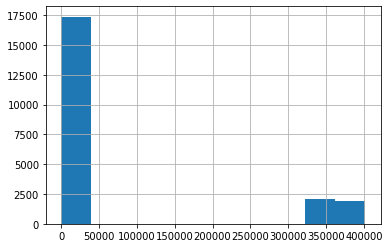

In [36]:
data.days_employed.hist()

Среди медианных значений трудового стажа выделяется возрастная группа "54 - 75". Значение для этой группы (343033), переведенное в годы трудового стажа дает результат в 939,8 лет.

Что ж, вопросов к данным в столбце *days_employed* все больше. К отрицательным значениям стажа вдобавок получаем неправдоподобно большой опыт работы. Следует адресовать вопрос о формировании данных в этом столбце стороне, предоставившей данные.

В запросе о проверке данных на корректность укажем, что именно вызвало вопросы, вероятно такой подход поможет быстрее локализовать место возникновения ошибки.

В нашей же ситуации нет задачи оценить зависимость возврата кредита в срок от трудового стажа заемщика, поэтому заполним пропуски получившимися значениями медианного стажа по возрастам:

In [11]:
data.loc[(data['age_category'] == '19 - 34') & (data['days_employed'].isnull()), 'days_employed'] = median_days_employed['19 - 34']
data.loc[(data['age_category'] == '35 - 43') & (data['days_employed'].isnull()), 'days_employed'] = median_days_employed['35 - 43']
data.loc[(data['age_category'] == '44 - 53') & (data['days_employed'].isnull()), 'days_employed'] = median_days_employed['44 - 53']
data.loc[(data['age_category'] == '54 - 75') & (data['days_employed'].isnull()), 'days_employed'] = median_days_employed['54 - 75']

Последний столбец исходной таблицы, в котором остались пропуски, *total_income*

Как описывалось выше, заполним пропуски нулевыми значениями

In [12]:
data.loc[data['total_income'].isnull(), 'total_income'] = 0

Все пропуски заполнены, посмотрим на общие данные исходной таблицы:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null float64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_category        21525 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


### Вывод

В разделе "Обработка пропусков" были заполнены пропуски в столбцах *days_employed*, *dob_years*, *gender* и *total_income*

В то же время в исходных данных была обнаружена следующая особенность: по порядка 10% заемщиков нет информации о стаже и уровне ежемесячного дохода. Было принято, что эти заемщики получили кредит без подтверждения уровня дохода. Эти заемщики были выделены в отдельную категорию по уровню ежемесячного дохода "доход не подтвержден"

### Замена типа данных

Заменим тип данных в столбце *days_employed* исходной таблицы на integer, так как значение количества дней - целое число. Для этого применим метод *astype()*

In [14]:
data['days_employed'] = data['days_employed'].astype(int)

Аналогично поступим с данными в столбце *dob_years*, так как количество лет подразумевает целочисленное значение

После применения проверим результат, выведя общую информацию о таблице.

In [15]:
data['dob_years'] = data['dob_years'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_category        21525 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


### Вывод

В разделе "Замена типа данных" был заменен тип данных в столбце *days_employed* с float64 на integer64 при помощи метода *astype()*
Единственный столбец, содержащий вещественные числа после преобразования типов данных - *total_income*. Оставим в прежнем виде для большей точности. На следующих этапах содержимое подлежит категоризации по величине дохода.
Для изменения типа данных был использован именно метод *astype()*, а не *to_numeric*, потому что он позволяет однозначно задать тип, к которому надо привести данные. *to_numeric* же лучше применим для преобразования строк в числа, в том числе с плавающей точкой

### Обработка дубликатов

На этапе первичного анализа были выявлены дубликаты в столбце *education*. Для того, чтобы их избежать приведем данные в столбце к нижнему регистру и проверим результат преобразования.

In [16]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

После преобразования проверим таблицу на дубликаты

In [17]:
data.duplicated().sum()

71

Имеем 71 дубликат. В исходной таблице не было ключевого столбца (например с id клиента), дубли в котором бы позволили точно говорить о том, что это один и тот же заемщик, а не совпадение данных у нескольких. За неимением этой информации и небольшим количеством дубликатов относительно общего числа строк, примем одинаковые строки за дубликаты и удалим их. Проверим результат, выведя общие данные о таблице

In [18]:
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
children            21454 non-null int64
days_employed       21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null float64
purpose             21454 non-null object
age_category        21454 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


### Вывод

На этапе удаления дубликатов было выявлено и обработано большое количество строк столбца *education*. Вероятней всего, это связано с ручным вводом информации. Для предотвращения появления подобных дубликатов в будущем имеет смысл на этапе заполнения данных предоставить сотруднику банка возможность выбора из выпадающего списка.

Далее в таблице была найдена 71 дублирующаяся строка. Что составляет 0,33% от всего массива данных. Найденные строки были удалены при помощи метода *drop_duplicates()* со сбросом индексов

### Лемматизация

Вспомним, какие значения принимают строки столбца *purpose*

In [19]:
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Импортируем библиотеку *pymystem3*

Напишем функцию, которая будет собирать в новый столбец *purpose_lemmas* результаты лемматизации целей кредита для каждой записи

In [20]:
 from pymystem3 import Mystem
m = Mystem()
from collections import Counter
 
def purpose_lemmas(purpose):
    lemma = ' '.join(m.lemmatize(purpose))
    return lemma
data['purpose_lemmas'] = data['purpose'].apply(purpose_lemmas)

Итак, разделим все цели кредита на четыре категории:
    - недвижимость;
    - свадьба;
    - автомобиль;
    - образование.
К категории "недвижимость" следует отнести два ключевых слова: *недвижимость* и *жилье* 

В переменную *purpose_cat* впишем слова, по которым далее будем категоризировать цели кредита. Создадим новый столбец *purpose_category* и впишем в него значения из переменной *purpose_cat*

In [21]:
def purpose_category(column):
    if 'жилье' in column:
        return 'жилье'
    if 'недвижимость' in column:
        return 'недвижимость'
    if 'автомобиль' in column:
        return 'автомобиль'
    if 'образование' in column:
        return 'образование'
    if 'свадьба' in column:
        return 'свадьба'
data['purpose_category'] = data['purpose_lemmas'].apply(purpose_category)
data['purpose_category'].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_category, dtype: int64

Для окончания обработки выделения категорий среди целей кредита осталось заменить в столбце *purpose_category* значения *жилье* на *недвижимость*

In [22]:
data['purpose_category'] = data['purpose_category'].replace('жилье', 'недвижимость')
data['purpose_category'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

### Вывод

В разделе "Лемматизация" были определены основные цели кредитования. Содержимое столбца *purpose* мы привели к леммам и разделили на отдельные слова, далее соотнесли леммы с основными целями кредитования.

На выходе получили новый столбец *purpose_category* с категориями целей кредитования для дальнейшего анализа

### Категоризация данных

Так как по цели кредитования данные уже категоризированы выше, нам осталось проделать эту операцию со столбцами *children* и *total_income*

В столбце *children* на начальном этапе были отмечены некорректные значения "-1" и "20". Суммарное количество строк с этими значениями = 123, что составляет порядка 0,5% от общего массива данных. Посмотрим, есть ли среди этих строк выделение из статистики по возврату кредитов в срок, и, если нет, то удалим их. 

In [23]:
child_error = data.loc[data['children'] == -1].append(data.loc[data['children'] == 20])
child_error['debt'].value_counts()

0    114
1      9
Name: debt, dtype: int64

Получаем 9 просроченных кредитов из 123, что составляет 7,3%. Это даже меньше среднего показателя просрочек, что позволяет нам удалить строки со значениями "-1" и "20"

In [24]:
data = data.loc[(data['children'] != -1) & (data['children'] != 20)]
data['children'].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Далее разделим заемщиков на категории по наличию и количеству детей в семье.
По условию задания необходимо найти зависимость возврата кредита в срок от наличия детей, но пойдем по пути чуть более глубокого погружения и разделим заемщиков на 3 категории:
    - 0 (нет детей);
    - 1-2 (1 или 2 ребенка в семье);
    - 3+ (многодетная семья).

In [25]:
def child_category(children):
    if children == 0:
        return '0'
    if 1 <= children <= 2:
        return '1-2'
    return '3+'
data['child_category'] = data['children'].apply(child_category)
data['child_category'].value_counts()

0      14091
1-2     6860
3+       380
Name: child_category, dtype: int64

И, наконец, разделим данные о заемщиках на категории по уровню дохода. Для равномерного распределения воспользуемся методом *describe* среди тех, у кого доход подтвержден и по квартилям разделим доходы на следующие категории:
    - низкий;
    - средний;
    - выше среднего;
    - высокий.

Кроме того, не забываем о категории "доход не подтвержден".

Для отделения заемщиков с подтвержденным доходом запишем в переменную *confirmed_income* информацию обо всех, чей доход известен.

In [26]:
confirmed_income = data.loc[data['total_income'] > 0]
confirmed_income['total_income'].describe()

count    1.924000e+04
mean     1.674488e+05
std      1.031051e+05
min      2.066726e+04
25%      1.030001e+05
50%      1.450208e+05
75%      2.034447e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [27]:
def income_category(income):
    if income == 0:
        return 'доход не подтвержден'
    if 0 < income <= 103000:
        return 'низкий'
    if 103000 < income <=145020:
        return 'средний'
    if 145020 < income <= 203000:
        return 'выше среднего'
    return 'высокий'
data['income_category'] = data['total_income'].apply(income_category)
data['income_category'].value_counts()

высокий                 4844
средний                 4810
низкий                  4810
выше среднего           4776
доход не подтвержден    2091
Name: income_category, dtype: int64

Получаем равномерное разделение достоверно известного уровня дохода на 4 категории в зависимости от его величины и отдельно рассматриваемую категорию заемщиков, доход которых не подтвержден

### Вывод

В разделе "Категоризация данных" мы закончили разделение информации из исходной таблицы на категории по показателям, которые требуется проанализировать. Теперь для определения зависимости возврата кредита в срок от этих данных, нужно лишь построить сводные таблицы и сделать выводы.

### Результаты исследования

Определим процент кредитов с просроченными платежами после удаления дубликатов и строк с некорректным количеством детей:

In [28]:
data['debt'].value_counts()

0    19599
1     1732
Name: debt, dtype: int64

Итак, в среднем просрочка платежей происходит в **8,1%** случаев. Перейдем к анализу появления задолженности по кредиту среди разных категорий заемщиков

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Построим сводную таблицу со значениями количества просроченных кредитов для категорий заемщиков по количеству детей. Благодаря тому, что в значениях столбца *debt* были нули и единицы, а единицы обозначали невозврат в срок, параметр *values* вернет нам значение доли просроченных кредитов для каждой категории.

In [29]:
pivot_child = data.pivot_table(index = ['child_category'], values = 'debt').sort_values(by = 'debt', ascending = False)
pivot_child

,debt
child_category,
1-2,0.093003
3+,0.081579
0,0.075438


### Вывод

Наиболее рискованной категорией для выдачи кредитов по наличию и количеству детей являются семьи, в которых 1-2 ребенка. Доля нарушений графика платежей для них будет равна **9,3%**. Многодетные вносят платежи по кредитам в срок в соответствии с общей статистикой и количество недисциплинированных плательщиков составляет **8,2%**. Лучшие же заемщики для банка - те, у которых нет детей, здесь проблемных кредитов **7,5%**.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим сводную таблицу со значениями столбца *debt* по содержимому столбца *family_status*

In [30]:
pivot_family_status = data.pivot_table(index = ['family_status'], values = 'debt').sort_values(by = 'debt', ascending = False)
pivot_family_status

,debt
family_status,
Не женат / не замужем,0.097639
гражданский брак,0.093130
женат / замужем,0.075606
в разводе,0.070648
вдовец / вдова,0.066246


### Вывод

На выходе получаем, что при разработке системы скоринга, стоит пристальное внимание направить на людей, чей семейный статус *не женат/не замужем* (**9,8%** просрочек) и *гражданский брак* (**9,3%** просрочек). В то время как для остальных категорий заемщиков показатели непроявления дисциплинированности при выплатах ниже среднего по всем кредитам. Для категории *женат/замужем* это **7,5%**, среди тех, кто *в разводе* - **7,1%**. И, наконец, самый низкий показатель видим в категории *вдовец/вдова* - **6,6%**

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу со значениями столбца *debt* по содержимому столбца *income_category*

In [31]:
pivot_income_value = data.pivot_table(index = ['income_category'], values = 'debt').sort_values(by = 'debt', ascending = False)
pivot_income_value

,debt
income_category,
выше среднего,0.088149
средний,0.086694
доход не подтвержден,0.081301
низкий,0.079626
высокий,0.070396


### Вывод

Неожиданные результаты ожидают нас при просмотре результатов зависимости возникновения просрочек по кредиту от уровня доходов. Заемщики, имеющие уровень дохода *выше среднего* и *средний*, несмотря на большее количество имеющихся на руках денежных средств, чаще средних показателей допускают нарушения в сроках платежей (**8,8%** и **8,7** соответственно). В то время как люди с *низким* уровнем дохода не платят по кредиту в срок в **7,9%** случаев.

Особняком здесь стоят заемщики с *высоким* доходом. Всего **7%** из них не вносят платежи вовремя.

- Как разные цели кредита влияют на его возврат в срок?

Построим сводную таблицу со значениями столбца *debt* по содержимому столбца *purpose_category*

In [32]:
pivot_purpose = data.pivot_table(index = ['purpose_category'], values = 'debt').sort_values(by = 'debt', ascending = False)
pivot_purpose

,debt
purpose_category,
автомобиль,0.093480
образование,0.092528
свадьба,0.079118
недвижимость,0.072551


### Вывод

И, наконец, посмотрим на результаты поиска зависимости возврата в срок от цели кредитования. Здесь при выдаче кредита стоит обратить внимание на цели *автомобиль* и *образование* (по **9,3%** просрочек). Кредиты на *свадьбу* вовремя выплачиваются чуть лучше чем среднее значение - **7,9%**. А наименее проблемной категорией по цели кредитования становится *недвижимость* - **7,3%** просрочек.

### Общий вывод

В данном проекте была обработана исходная таблица с данными. Заполнены пропущенные значения, удалены дубликаты, данные разделены по категориям.

По результатам анализа можно сделать вывод, что идеальный заемщик для банка - это бездетный, находящийся в разводе человек с высоким уровнем дохода.

